In [1]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('BTC-USD_day_yfin.csv')

In [2]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [3]:
df1['Price'] = df1['Adj Close']
df2 = df1[['Date','Price']]
df2 = df2.iloc[::-1]

In [4]:
lag = 5
for i in range (1,lag+1):
    df2['price_l'+str(i)] = df2['Price'][i:]
    df2['price_l'+str(i)] = df2['price_l'+str(i)].shift(-i)


In [5]:
df2 = df2.head(len(df2)-lag)

In [6]:
test = df2.head(365)
train = df2.tail(2190-365)
x_test = test.drop(columns = ['Date', 'Price'])
x_train = train.drop(columns = ['Date', 'Price'])
y_test = test['Price']
y_train = train['Price']


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
grid = dict()
grid['max_depth'] = [5, 10, 15]
grid['min_samples_split'] = [5, 10, 20]
grid['min_samples_leaf'] = [4, 6, 10]
grid['max_features'] = ['auto', 'sqrt']

cv = RepeatedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv)
grid_result = grid_search.fit(x_train, y_train)

C:\Users\HuenCH\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HuenCH\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HuenCH\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

In [8]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 10}


In [9]:
rf_reg_best = RandomForestRegressor(max_depth = 10, min_samples_leaf = 6,  min_samples_split = 10, max_features= 'auto')
rf_reg_best.fit(x_train,y_train)
preds = rf_reg_best.predict(x_test)

C:\Users\HuenCH\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [10]:
df4 = x_test
df4['Price'] = y_test
df4['Pred'] = preds
df4

,price_l1,price_l2,price_l3,price_l4,price_l5,Price,Pred
2190,42156.902344,42099.402344,42627.855469,43442.855469,42520.402344,42265.187500,41689.588884
2189,42099.402344,42627.855469,43442.855469,42520.402344,43613.140625,42156.902344,41553.208648
2188,42627.855469,43442.855469,42520.402344,43613.140625,43016.117188,42099.402344,42454.048490
2187,43442.855469,42520.402344,43613.140625,43016.117188,43739.542969,42627.855469,42816.770973
2186,42520.402344,43613.140625,43016.117188,43739.542969,43997.902344,43442.855469,41888.950474
...,...,...,...,...,...,...,...
1830,16863.238281,16679.857422,16688.470703,16625.080078,16547.496094,16836.736328,16844.950862
1829,16679.857422,16688.470703,16625.080078,16547.496094,16602.585938,16863.238281,16673.388998
1828,16688.470703,16625.080078,16547.496094,16602.585938,16642.341797,16679.857422,16656.607836
1827,16625.080078,16547.496094,16602.585938,16642.341797,16552.572266,16688.470703,16661.771864


In [11]:
sum((df4['Pred']-df4['Price'])**2)/365


877184.8970937238

In [12]:
df4['Date'] = test['Date']
df4

,price_l1,price_l2,price_l3,price_l4,price_l5,Price,Pred,Date
2190,42156.902344,42099.402344,42627.855469,43442.855469,42520.402344,42265.187500,41689.588884,2023-12-31
2189,42099.402344,42627.855469,43442.855469,42520.402344,43613.140625,42156.902344,41553.208648,2023-12-30
2188,42627.855469,43442.855469,42520.402344,43613.140625,43016.117188,42099.402344,42454.048490,2023-12-29
2187,43442.855469,42520.402344,43613.140625,43016.117188,43739.542969,42627.855469,42816.770973,2023-12-28
2186,42520.402344,43613.140625,43016.117188,43739.542969,43997.902344,43442.855469,41888.950474,2023-12-27
...,...,...,...,...,...,...,...,...
1830,16863.238281,16679.857422,16688.470703,16625.080078,16547.496094,16836.736328,16844.950862,2023-01-05
1829,16679.857422,16688.470703,16625.080078,16547.496094,16602.585938,16863.238281,16673.388998,2023-01-04
1828,16688.470703,16625.080078,16547.496094,16602.585938,16642.341797,16679.857422,16656.607836,2023-01-03
1827,16625.080078,16547.496094,16602.585938,16642.341797,16552.572266,16688.470703,16661.771864,2023-01-02


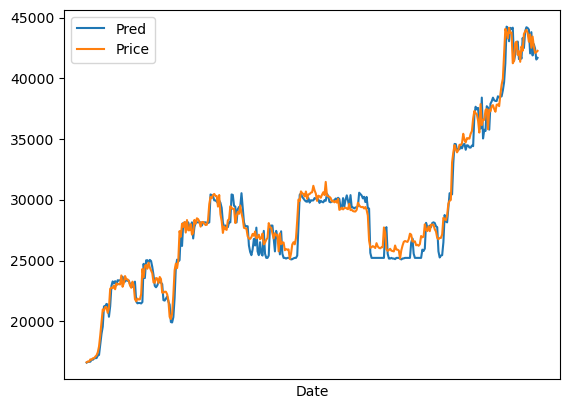

In [13]:
import matplotlib.pyplot as plt
df4 = df4.iloc[::-1]
df4.plot(x="Date", y=["Pred","Price"])
plt.xticks([])
plt.show()